原文：https://www.cnblogs.com/datahunter/p/3808252.html

在看机器学习的论文时，经常会看到有作者提到“curse of dimensionality”，中文译为“维数灾难”，这到底是一个什么样的“灾难”？本文将通过一个例子来介绍这令人讨厌的“curse of dimensionality”以及它在分类问题中的重要性。

　　假设现在有一组照片，每一张照片里有一只猫或者一条狗。我们希望设计一个分类器可以自动地将照片中的动物辨别开来。为了实现这个目标，首先需要考虑如何将照片中的动物的特征用数字的形式表达出来。猫与狗的最大区别是什么？有人可能首先想到猫与狗的颜色不一样，有人则可能想到猫与狗的大小不一样。假设从颜色来辨别猫与狗，可以设计三个特征：红色的平均值，绿色的平均值和蓝色的平均值，来决定照片中的动物属于哪一个类：

`
if 0.5 * red + 0.3 * green + 0.2 * blue > 0.6:
    return cat
else:
    return dog
`

　　但是，仅仅通过这三个特征进行分类可能无法得到一个令人满意的结果。因此，可以再增加一些特征：大小，纹理等。也许增加特征之后，分类的结果会有所提高。但是，特征是不是越多越好？
  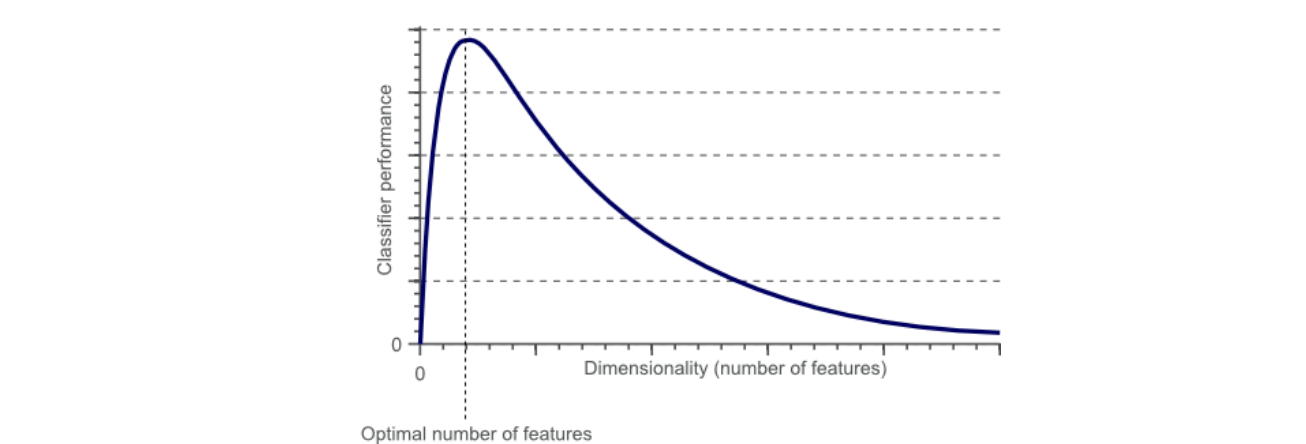
   从图1可以看到分类器的性能随着特征个数的变化不断增加，过了某一个值后，性能不升反降。这种现象称为“维数灾难”。

　　继续之前的例子。假设地球上猫和狗的数量是无限的。由于有限的时间和计算能力，我们仅仅选取了10张照片作为训练样本。我们的目的是基于这10张照片来训练一个线性分类器，使得这个线性分类器可以对剩余的猫或狗的照片进行正确分类。我们从只用一个特征来辨别猫和狗开始：
  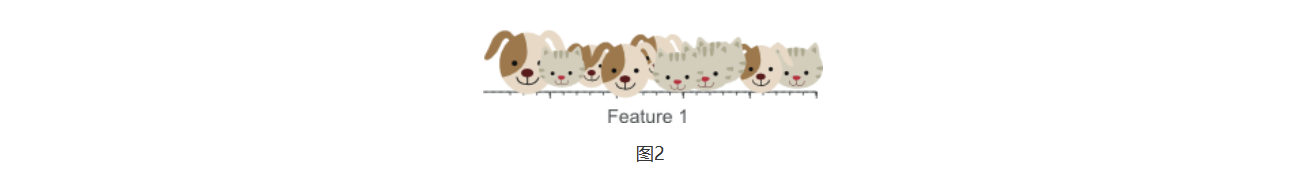
  从图2可以看到，如果仅仅只有一个特征的话，猫和狗几乎是均匀分布在这条线段上，很难将10张照片线性分类。那么，增加一个特征后的情况会怎么样：
  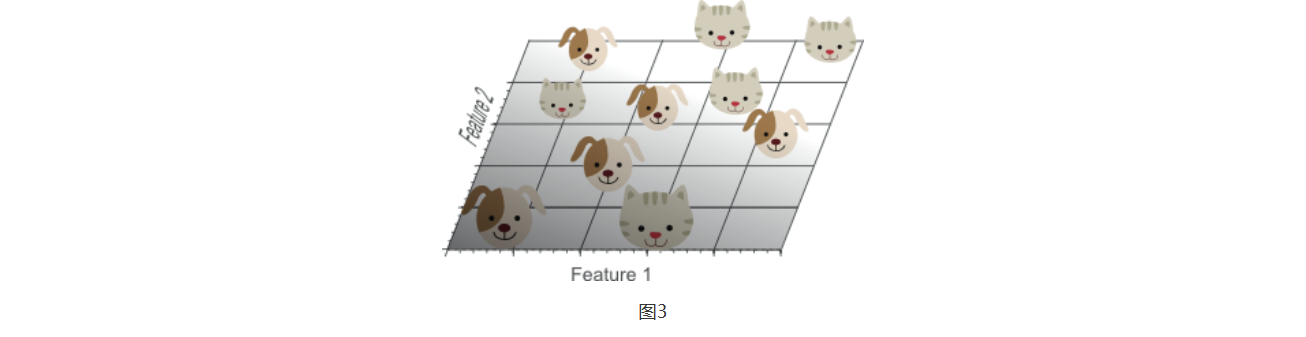
  增加一个特征后，我们发现仍然无法找到一条直线将猫和狗分开。所以，考虑需要再增加一个特征：
  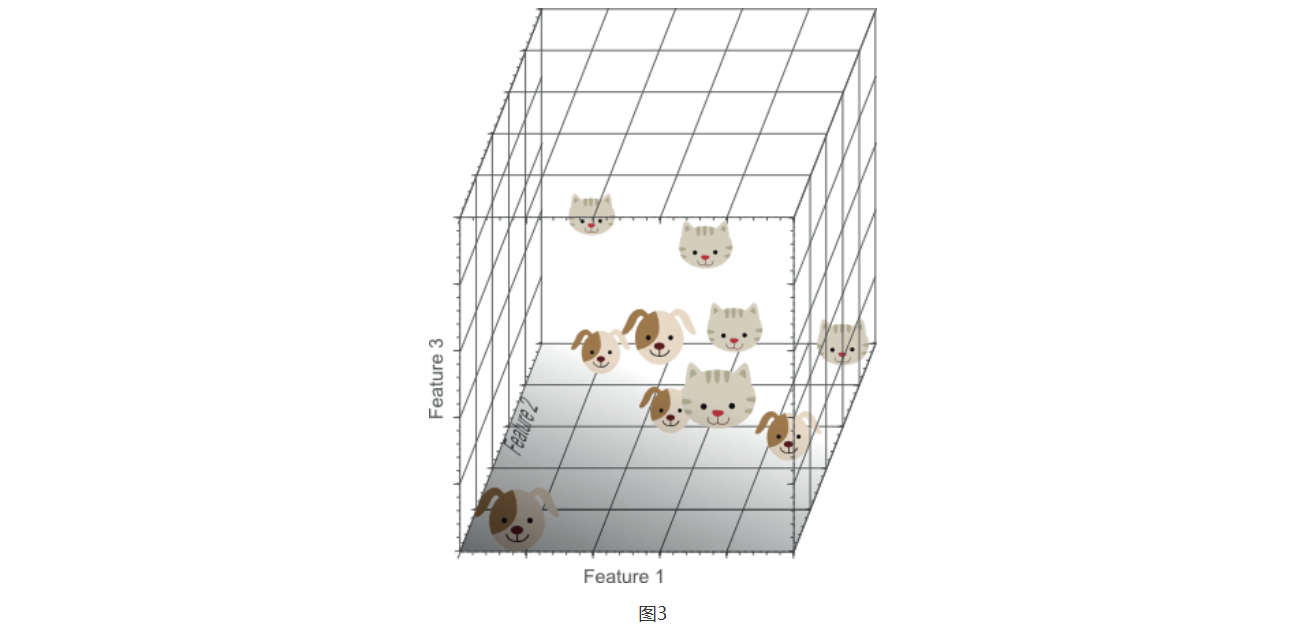
  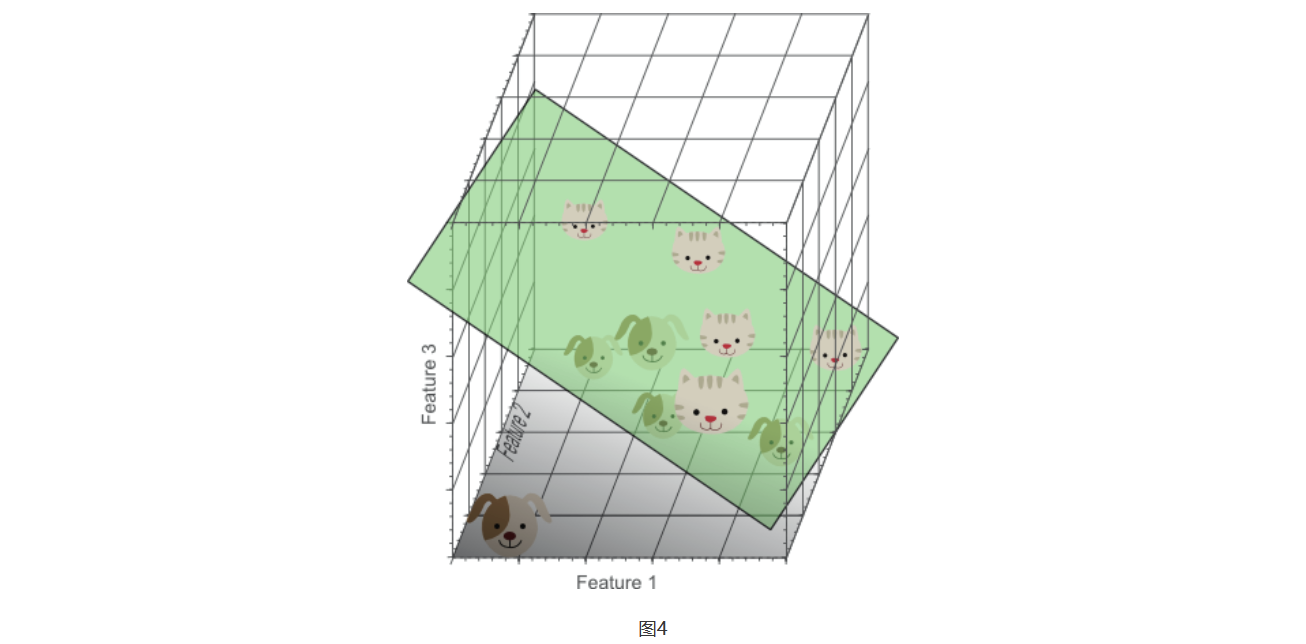
  此时，我们终于找到了一个平面将猫和狗分开。需要注意的是，只有一个特征时，假设特征空间是长度为5的线段，则样本密度是10/5=2。有两个特征时，特征空间大小是5*5=25，样本密度是10/25=0.4。有三个特征时，特征空间大小是5\*5\*5=125，样本密度是10/125=0.08。如果继续增加特征数量，样本密度会更加稀疏，也就更容易找到一个超平面将训练样本分开。因为随着特征数量趋向于无限大，样本密度非常稀疏，训练样本被分错的可能性趋向于零。当我们将高维空间的分类结果映射到低维空间时，一个严重的问题出现了：
  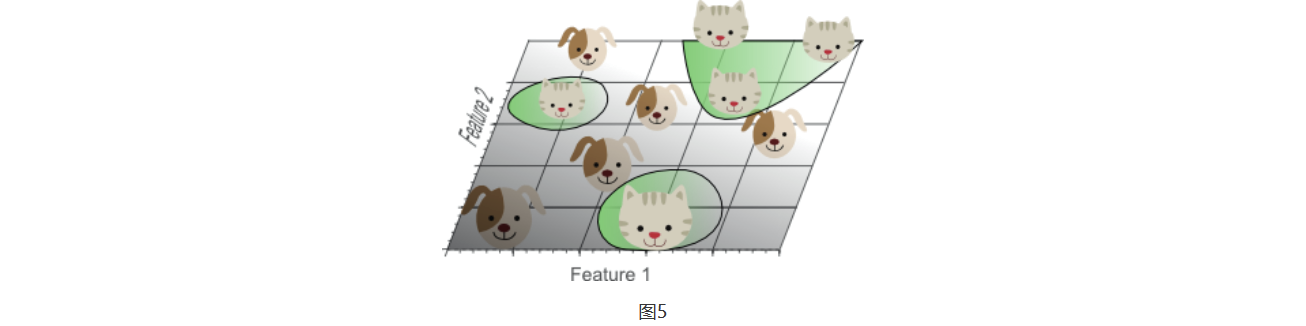
  从图5可以看到将三维特征空间映射到二维特征空间后的结果。尽管在高维特征空间时训练样本线性可分，但是映射到低维空间后，结果正好相反。事实上，增加特征数量使得高维空间线性可分，相当于在低维空间内训练一个复杂的非线性分类器。不过，这个非线性分类器太过“聪明”，仅仅学到了一些特例。如果将其用来辨别那些未曾出现在训练样本中的测试样本时，通常结果不太理想。这其实就是我们在机器学习中学过的过拟合问题。
  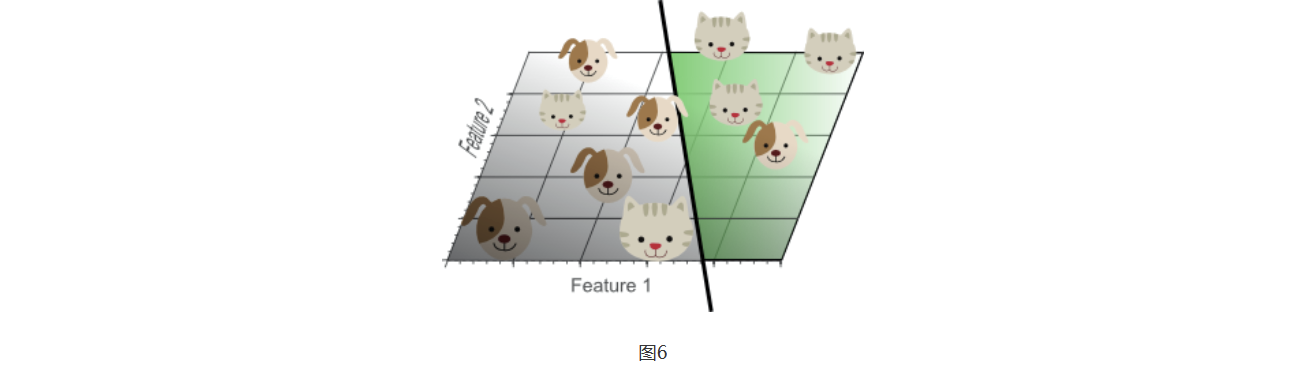
  尽管图6所示的只采用2个特征的线性分类器分错了一些训练样本，准确率似乎没有图4的高，但是，采用2个特征的线性分类器的泛化能力比采用3个特征的线性分类器要强。因为，采用2个特征的线性分类器学习到的不只是特例，而是一个整体趋势，对于那些未曾出现过的样本也可以比较好地辨别开来。换句话说，通过减少特征数量，可以避免出现过拟合问题，从而避免“维数灾难”。
  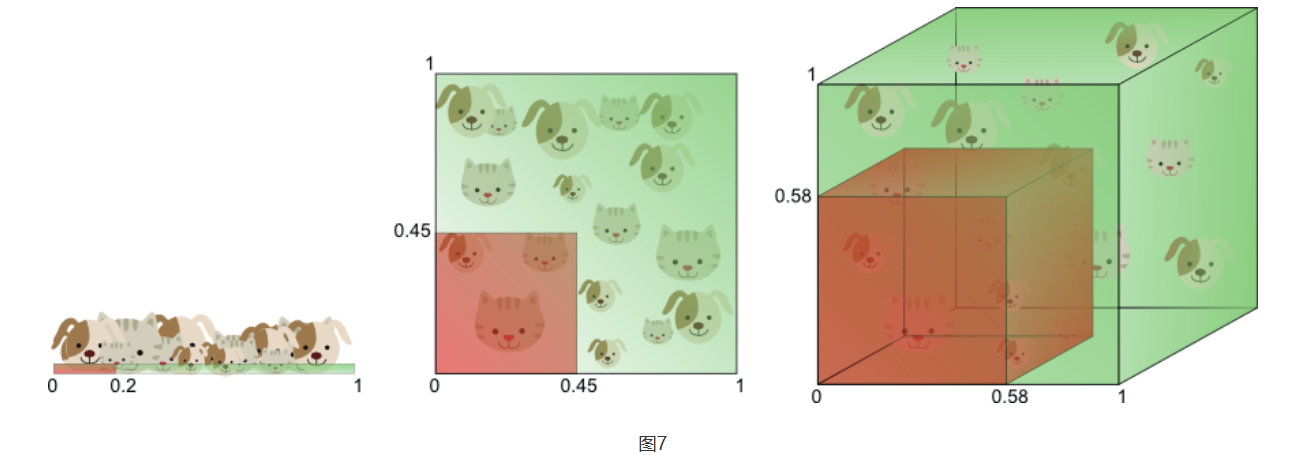
  图7从另一个角度诠释了“维数灾难”。假设只有一个特征时，特征的值域是0到1，每一只猫和狗的特征值都是唯一的。如果我们希望训练样本覆盖特征值值域的20%，那么就需要猫和狗总数的20%。我们增加一个特征后，为了继续覆盖特征值值域的20%就需要猫和狗总数的45%(0.45^2=0.2)。继续增加一个特征后，需要猫和狗总数的58%(0.58^3=0.2)。随着特征数量的增加，为了覆盖特征值值域的20%，就需要更多的训练样本。如果没有足够的训练样本，就可能会出现过拟合问题。

　　通过上述例子，我们可以看到特征数量越多，训练样本就会越稀疏，分类器的参数估计就会越不准确，更加容易出现过拟合问题。“维数灾难”的另一个影响是训练样本的稀疏性并不是均匀分布的。处于中心位置的训练样本比四周的训练样本更加稀疏。
  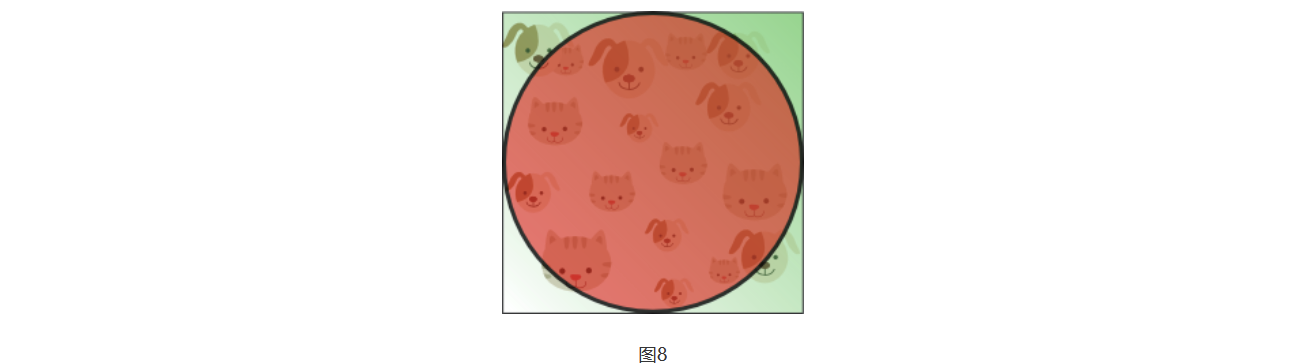
　　假设有一个二维特征空间，如图8所示的矩形，在矩形内部有一个内切的圆形。由于越接近圆心的样本越稀疏，因此，相比于圆形内的样本，那些位于矩形四角的样本更加难以分类。那么，随着特征数量的增加，圆形的面积会不会变化呢？这里我们假设超立方体(hypercube)的边长d=1，那么计算半径为0.5的超球面(hypersphere)的体积(volume)的公式为：
  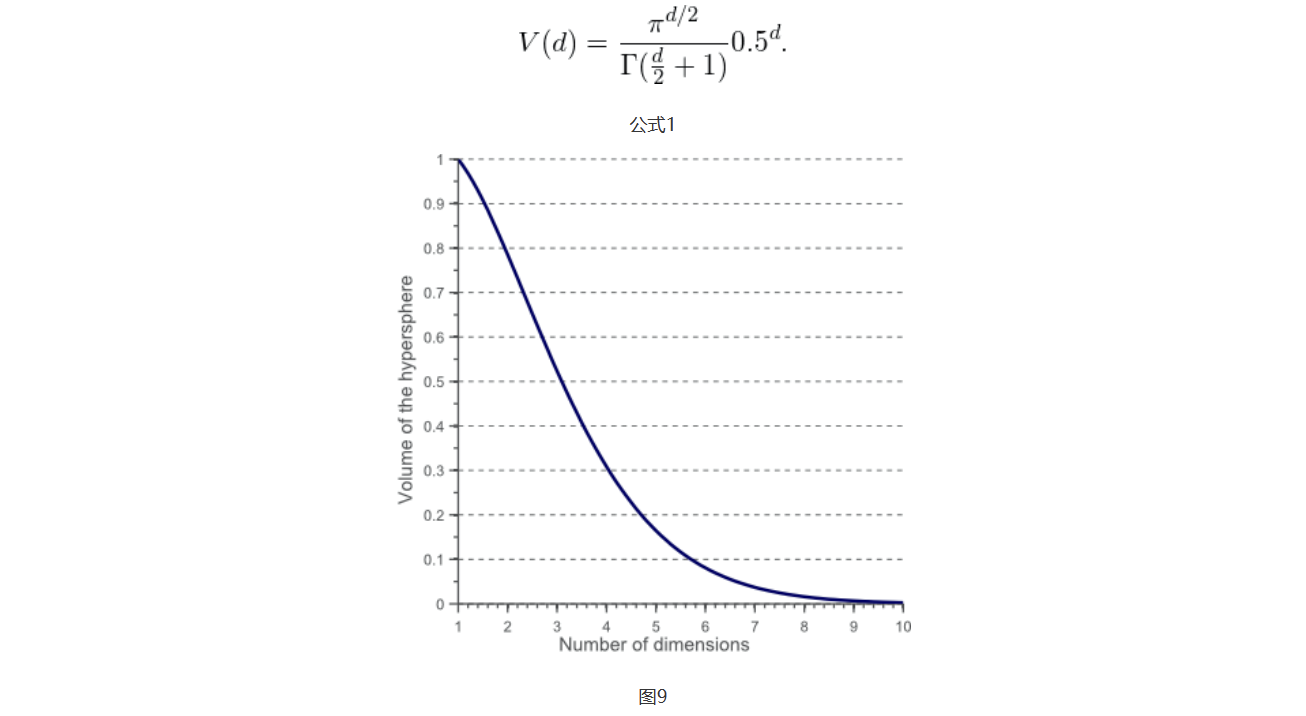
  从图9可以看出随着特征数量的增加，超球面的体积逐渐减小直至趋向于零，然而超立方体的体积却不变。这个结果有点出乎意料，但部分说明了分类问题中的“维数灾难”：在高维特征空间中，大多数的训练样本位于超立方体的角落。
  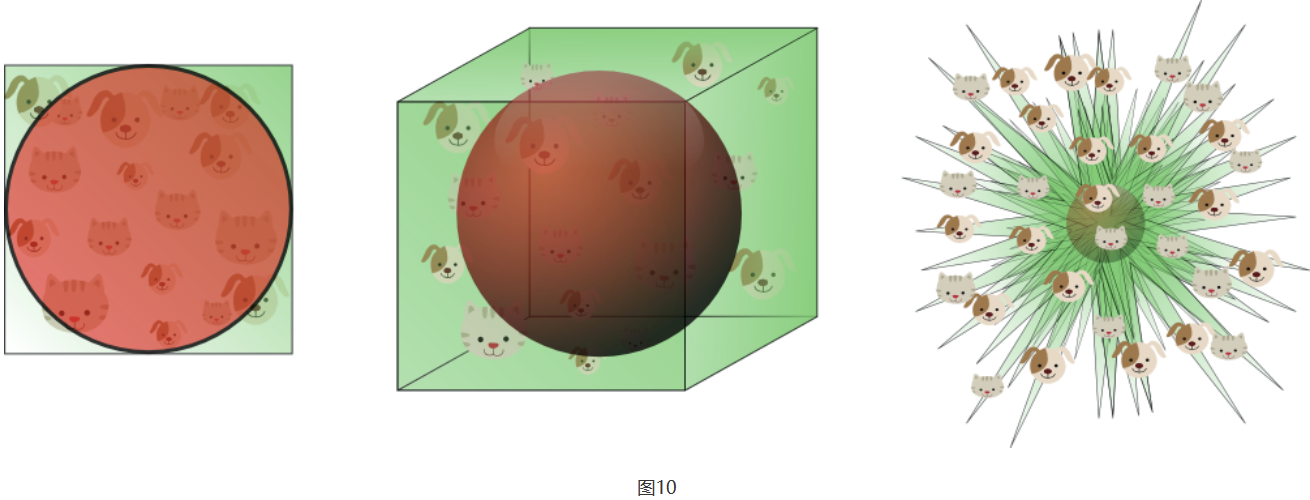
  图10显示了不同维度下，样本的分布情况。在8维特征空间中，共有2^8=256个角落，而98%的样本分布在这些角落。随着维度的不断增加，公式2将趋向于0，其中dist_max和dist_min分别表示样本到中心的最大与最小距离。
  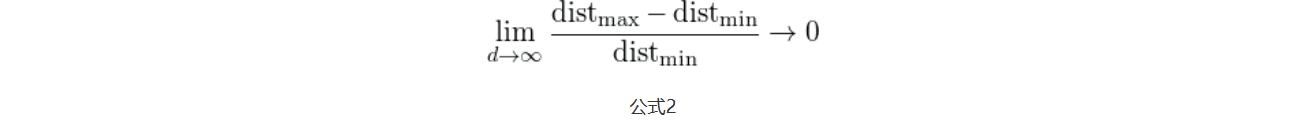
  因此，在高维特征空间中对于样本距离的度量失去意义。由于分类器基本都依赖于如Euclidean距离，Manhattan距离等，所以在特征数量过大时，分类器的性能就会出现下降。

　　所以，我们如何避免“维数灾难”？图1显示了分类器的性能随着特征个数的变化不断增加，过了某一个值后，性能不升反降。这里的某一个值到底是多少呢？目前，还没有方法来确定分类问题中的这个阈值是多少，这依赖于训练样本的数量，决策边界的复杂性以及分类器的类型。理论上，如果训练样本的数量无限大，那么就不会存在“维数灾难”，我们可以采用任意多的特征来训练分类器。事实上，训练样本的数量是有限的，所以不应该采用过多的特征。此外，那些需要精确的非线性决策边界的分类器，比如neural network，knn，decision trees等的泛化能力往往并不是很好，更容易发生过拟合问题。因此，在设计这些分类器时应当慎重考虑特征的数量。相反，那些泛化能力较好的分类器，比如naive Bayesian，linear classifier等，可以适当增加特征的数量。

　　如果给定了N个特征，我们该如何从中选出M个最优的特征？最简单粗暴的方法是尝试所有特征的组合，从中挑出M个最优的特征。事实上，这是非常花时间的，或者说不可行的。其实，已经有许多特征选择算法(feature selection algorithms)来帮助我们确定特征的数量以及选择特征。此外，还有许多特征抽取方法(feature extraction methods)，比如PCA等。交叉验证(cross-validation)也常常被用于检测与避免过拟合问题。